# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


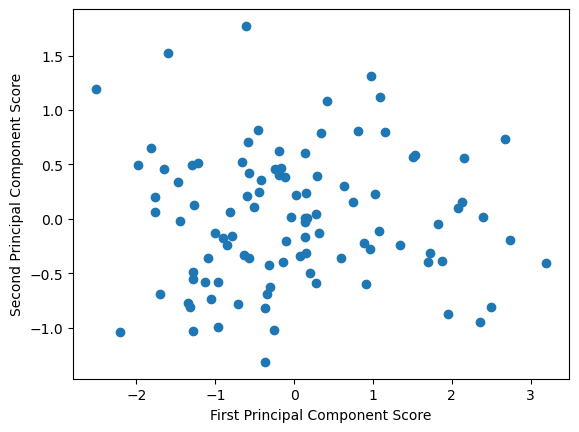

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")
plt.show()

## PCA Discussion
> The three outliers in the upper left corner are far from the origin where the main cluster lies. They show low PC1 scores and high PC2 scores. A low PC1 score indicates that the outliers project strongly in the negative direction of the first principal component which represents the main trend in the dataset. A high PC2 score indicates strong alignment on the second most significant pattern in the positive direction. Looking at the components, we can evaluate how the original features (series 1, 2, and 3) contribute to each principal component.

>PC1 is influenced heavily by series 3 (0.91), with less contribution from series 1 (0.27) and series 2 (0.30). In comparison, PC2 is more influenced by series 1 (0.60) and series 2 (0.69), with series 3 (-0.40) contributing slightly in the opposite direction. Since series 1 and 2 have fairly balanced contributions in PC1 and PC2; there is not much insight that can be gained in regard to the outliers behavior. Series 3, however, has a significant influence on PC1 and the outliers' low PC1 scores indicate a strong negative deviation from the main trend, most likely due to values from series 3. 

>PC1 represents about 79% of the total variance which suggests that these outliers are most likely due to noise or error, but futher investigation could be insightful, especially into series 3. What if this is a possible new subgroup instead of outliers?

## Advantages
> The adavantages of plotting first principal component scores against the second principal component scores gives insight into relationships or groupings in the data by reducing the dimensionality of your dataset for better interpretation. Points that are clustered together have similar behavior; where as points spread further apart, have differing behaviors. This is useful when identifying potential outliers that can create noise in your analysis.

## Disadvantages
> This scatter plot would be more useful if the three series were colored differently so groupings and feature influence could be interpreted better.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RepeatedKFold
                                     )
from sklearn.metrics import mean_squared_error
import seaborn as sns
import kagglehub
import os

In [3]:
def load_Kaggle_dataset(kaggle_path, kaggle_filename, index_col=0):

    # Download latest version
    path = kagglehub.dataset_download(kaggle_path)
    print("Path to dataset files:", path)

    # Load the data into a DataFrame
    csv_path = os.path.join(path, kaggle_filename)
    raw_data = pd.read_csv(csv_path, index_col=index_col)

    return raw_data

In [4]:
# Load raw data from Kagglehub
phishing_raw = load_Kaggle_dataset('shashwatwork/web-page-phishing-detection-dataset', 'dataset_phishing.csv', index_col=None)

Path to dataset files: /Users/rosemarydabbs/.cache/kagglehub/datasets/shashwatwork/web-page-phishing-detection-dataset/versions/2


In [5]:
# Encode status column
one_hot = pd.get_dummies(phishing_raw["status"])
phishing = phishing_raw.join(one_hot).copy()

# Convert to integers
phishing[['legitimate','phishing']] = phishing[['legitimate','phishing']].astype(int)

In [6]:
# Remove unneccessary identifying columns and separate target/features for modeling
X = phishing.drop(columns=['url', 'status', 'phishing', 'legitimate'])
y = phishing['legitimate']

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select only numeric features for PCA
phishing_numeric = X.select_dtypes(include=['number'])

[9.99997423e-01 2.41473156e-06 1.52668559e-07]
[[ 2.00075394e-06  8.81556946e-07  3.00956610e-08  6.03778794e-08
  -4.33646100e-08 -7.37082343e-10  2.62578623e-08  6.78260995e-08
   0.00000000e+00  9.39528031e-08  4.86419362e-08 -5.58178516e-10
  -3.85154080e-09 -4.12750684e-09 -1.47798697e-10 -1.85264146e-09
   1.14277842e-10  3.28021206e-10  1.74295631e-09  5.19359036e-10
   1.06540145e-09  3.19049761e-08  6.66490662e-10  6.78271919e-10
  -2.65432202e-09  2.77393670e-09 -2.78126783e-09 -7.52938326e-11
  -2.03901833e-10 -8.07794421e-09  3.44374609e-08 -3.23908400e-09
   2.64089779e-08  1.58536130e-08  1.81477043e-09 -1.40627011e-08
  -2.55817291e-11 -8.88976870e-09 -6.77644315e-10  1.38405766e-07
   5.58106922e-08 -1.54851546e-08 -6.66291140e-08 -9.16806056e-08
   7.78863372e-09  9.55195192e-08  3.34135956e-08  3.69493328e-08
   3.39530621e-08 -2.01685908e-08 -1.55329567e-08 -1.63034335e-08
  -6.19928926e-10  6.35697664e-10 -8.31406651e-10 -4.44229631e-09
  -3.91858933e-06  1.76631302

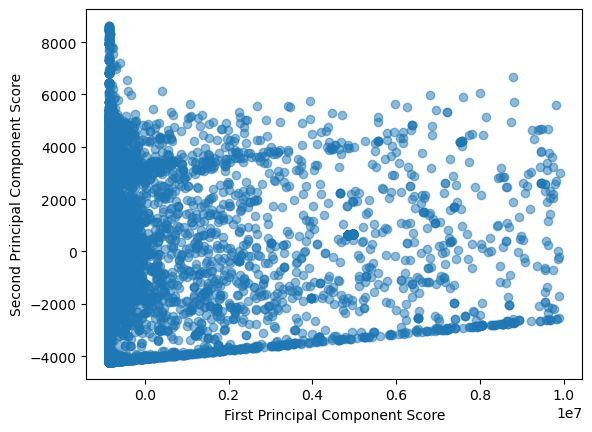

In [7]:
phishing_numeric = phishing_numeric - phishing_numeric.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca = decomposition.PCA(n_components = 3)
pca.fit(phishing_numeric)
print(pca.explained_variance_ratio_)
print(pca.components_)

first_principal_component_score = phishing_numeric.dot(pca.components_[0])
second_principal_component_score = phishing_numeric.dot(pca.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score, alpha=0.5)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")
plt.show()

In [8]:
def run_model(model, X_train, y_train, X_test, y_test, n_repeats=10, n_jobs=-1, **model_params):

    # Instantiate the model if a class is provided, so for example can use either BaggingRegressor or BaggingRegressor() as argument. 
    if isinstance(model, type):
        model = model(**model_params)

    neg_mse_scores = cross_val_score(model, X_train, y_train,scoring = 'neg_mean_squared_error',
                                     cv = RepeatedKFold(n_splits=5, n_repeats=n_repeats, random_state=42), n_jobs  = n_jobs)
    
    mean_cv_mse = -np.mean(neg_mse_scores)
    std_cv_mse  = np.std(neg_mse_scores)
    
    # Fit the model on the full training set
    model.fit(X_train, y_train)
    
    # Compute training MSE and testing MSE
    train_preds = model.predict(X_train)
    train_mse   = mean_squared_error(y_train, train_preds)
    test_preds  = model.predict(X_test)
    test_mse    = mean_squared_error(y_test, test_preds)
    
    return mean_cv_mse, std_cv_mse, train_mse, test_mse

In [9]:
cv_mse1, std_cv1, train_mse1, test_mse1 = run_model(model=LinearRegression(),
                                                X_train=X_train,
                                                y_train=y_train,
                                                X_test=X_test,
                                                y_test=y_test,
                                                n_repeats=5,
                                                n_jobs=-1
                                                )

In [10]:
# Filter down to three features
X_train_filtered = X_train[['length_hostname', 'length_url', 'domain_age']]
X_test_filtered = X_test[['length_hostname', 'length_url', 'domain_age']]


In [11]:
cv_mse2, std_cv2, train_mse2, test_mse2 = run_model(model=LinearRegression(),
                                                X_train=X_train_filtered,
                                                y_train=y_train,
                                                X_test=X_test_filtered,
                                                y_test=y_test,
                                                n_repeats=5,
                                                n_jobs=-1
                                                )

## Results

In [12]:
print('All features:')
print(f'CV MSE: {cv_mse1:.4f}')
print(f'Std CV: {std_cv1:.4f}')
print(f'Train MSE: {train_mse1:.4f}')
print(f'Test MSE: {test_mse1:.4f}')

All features:
CV MSE: 0.0702
Std CV: 0.0020
Train MSE: 0.0684
Test MSE: 0.0639


In [13]:
print('Three features: Length of hostname, Length of URL, and domain age')
print(f'CV MSE: {cv_mse2:.4f}')
print(f'Std CV: {std_cv2:.4f}')
print(f'Train MSE: {train_mse2:.4f}')
print(f'Test MSE: {test_mse2:.4f}')

Three features: Length of hostname, Length of URL, and domain age
CV MSE: 0.1996
Std CV: 0.0043
Train MSE: 0.1989
Test MSE: 0.1944


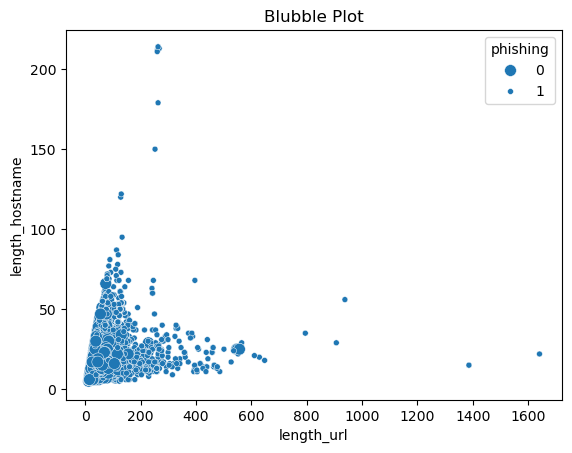

In [14]:
# Define Three Variables to plot
x = 'length_url'
y = 'length_hostname'
s = 'phishing'

min = phishing[s].min()
max = phishing[s].max()
maxbubble = 200
ax = sns.scatterplot(data = phishing, x = x, y = y, size = s)
ax.set_title('Blubble Plot')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.legend(title=s)
None

In [15]:
# Categorized the columns by length: Short, Medium, or Long
for  col in ['length_url', 'length_hostname']:
    phishing[f'{col}_cat'] = pd.qcut(phishing[col], q=3, labels=['Short', 'Medium', 'Long'])

phishing

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_age,web_traffic,dns_record,google_index,page_rank,status,legitimate,phishing,length_url_cat,length_hostname_cat
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,-1,0,1,1,4,legitimate,1,0,Short,Medium
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,5767,0,0,1,2,phishing,0,1,Long,Long
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,4004,5828815,0,1,0,phishing,0,1,Long,Long
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,-1,107721,0,0,3,legitimate,1,0,Short,Short
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,8175,8725,0,0,6,legitimate,1,0,Medium,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,5396,3980,0,0,6,legitimate,1,0,Medium,Medium
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,6728,0,0,1,0,phishing,0,1,Long,Medium
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,8515,8,0,1,10,legitimate,1,0,Long,Short
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,2836,2455493,0,0,4,legitimate,1,0,Medium,Long


In [16]:
# Create pivot table
pivot = phishing.pivot_table(index = ['length_url_cat'], columns = ['length_hostname_cat'], aggfunc = "size", observed=False)
pivot

length_hostname_cat,Short,Medium,Long
length_url_cat,,,
Short,1698,1354,825
Medium,1316,1240,1231
Long,1170,1076,1520


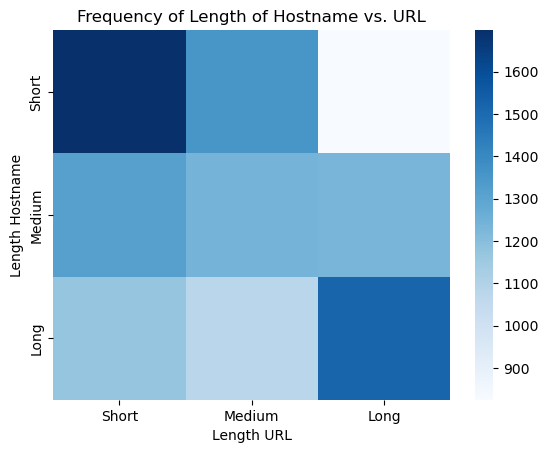

In [17]:
# Plot heat map
ax = sns.heatmap(pivot, cmap = "Blues")
ax.set_title("Frequency of Length of Hostname vs. URL")
ax.set_ylabel("Length Hostname")
ax.set_xlabel("Length URL")
None

### Conclusions:
Performing a principal components analysis on this dataset was difficult to interpret because my datasets are classification. My explained variance ratios were PC1: 9.99997423e-01, PC2: 2.41473156e-06, and PC3: 1.52668559e-07 suggesting that there was a small amount of variance explained by the 1st principal component. I'd like to explore using classification instead of regression to see if that would yield different results. Using all the features, my results were train MSE (0.0684) and test MSE (0.0639). Using just length of URL, length of hostname, and domain age, I calculated a better train MSE (0.1989) and a better test MSE (0.1944) which suggests that these features would be useful in prediction.

Looking at the bubble plot, the outliers mostly appear to be labelled as phishing. These points will most likely be easy to predict correctly. There is some mixing happening in the main cluster. However, it appears that the general trend is that the shorter the length of the URL and length of the hostname, there is a higher likelihood that the URLs are legitmate. This conclusion is supported by the heatmap that shows it is most common to have both short hostnames and URLs.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

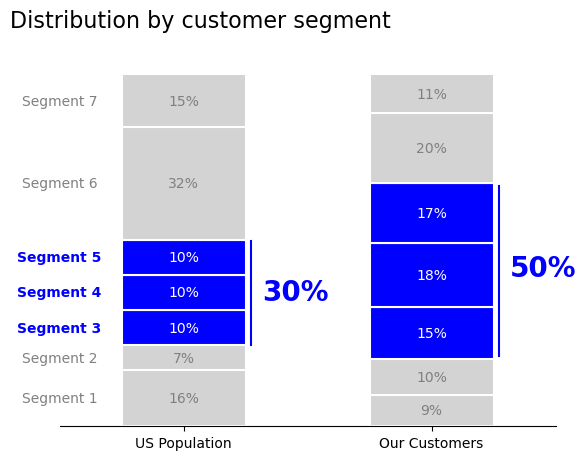

In [18]:
# -------------------------------
# Recreation of graph from p. 148
# -------------------------------

# DataFrame
df = pd.DataFrame({
    'Segment 1': [16, 9],
    'Segment 2': [7, 10],
    'Segment 3': [10, 15],
    'Segment 4': [10, 18],
    'Segment 5': [10, 17],
    'Segment 6': [32, 20],
    'Segment 7': [15, 11],
}, index=['US Population', 'Our Customers'])

# Custom colors
colors = ['lightgray', 'lightgray', 'blue', 'blue', 'blue', 'lightgray', 'lightgray']

# Plot
ax = df.plot(kind='bar', stacked=True, color=colors, edgecolor='white', linewidth=1.5)

# Custom title
ax.text(-0.1, 1.08, 'Distribution by customer segment',
        transform=ax.transAxes,
        fontsize=16,
        ha='left')

# Add labels to each stack and highlight with appropriate colors
for i, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2

    # Assign label color based on index
    if i in range(4, 10):
        label_color = 'white'
    else:
        label_color = 'gray'
    
    # Add label for stack values
    ax.text(x, y, f'{int(height)}%', ha='center', va='center', fontsize=10, color=label_color)

    # Add text for segments
    if i % 2 == 0:
        segments = i/2 + 1
        # Highlight segments 3, 4, and 5 blue
        if segments in [3, 4, 5]:
            ax.text(-0.5, y, f'Segment {int(segments)}', ha='center', va='center', fontsize=10, color='blue', fontweight='bold')
        else:
            ax.text(-0.5, y, f'Segment {int(segments)}', ha='center', va='center', fontsize=10, color='gray')

# Add brackets
plt.axvline(x=0.27, ymin=0.22, ymax=0.5, color='blue')
ax.text(0.45, 38, '30%', ha='center', va='center', fontsize=20, color='blue', fontweight='bold')
plt.axvline(x=1.27, ymin=0.19, ymax=0.65, color='blue')
ax.text(1.45, 45, '50%', ha='center', va='center', fontsize=20, color='blue', fontweight='bold')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Formating axis
plt.xticks(rotation=0)
plt.yticks([])

plt.legend().remove()
plt.show()

